1) เขียนโปรแกรมสำหรับสร้างแบบจำลองเชิงเส้นด้วยวิธีลดความชัน พร้อมทั้งแสดงฟังก์ชันค่าใช้จ่าย ในรูปของคอนทัวร์และแสดงให้เห็นถึงขั้นตอนในการปรับพารามิเตอร์

round to optimize : 35


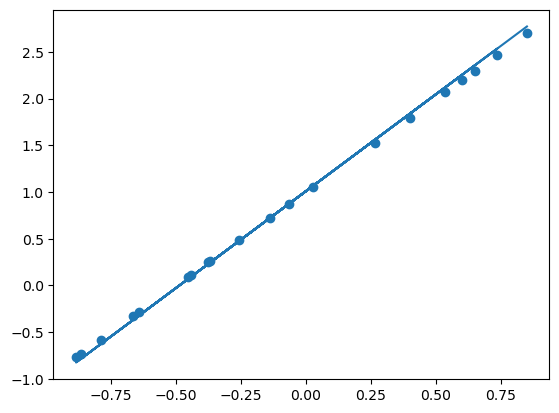

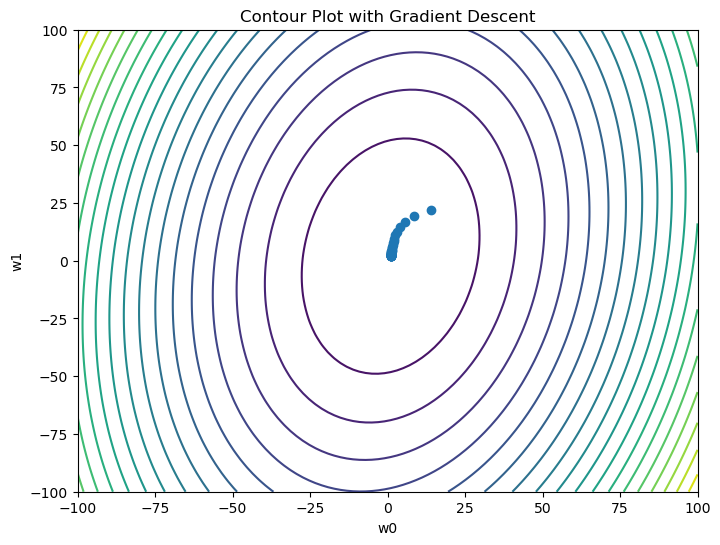

In [124]:
import numpy as np
import matplotlib.pyplot as plt


x = np.random.uniform(-1, 1, size=(20, 1))
y = 2*x+1

a = np.linspace(-100, 100, 100)
b = np.linspace(-100, 100, 100)

list_w0 = []
list_w1 = []

X, Y = np.meshgrid(a, b)

def MSE(w0,w1,x,y):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i])**2
    return S/(2*len(x))

def Fw0(w0,w1,x):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i])
    return S

def Fw1(w0,w1,x):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i]) * x[i]
    return S

def Gradeint_Descent(w0,w1,x,y):
    alpha = 0.5
    mse = 1000
    i = 0
    while mse > 0.001:
        w0 = w0 - (alpha/len(x)) * Fw0(w0,w1,x)
        w1 = w1 - (alpha/len(x)) * Fw1(w0,w1,x)
        mse = MSE(w0,w1,x,y)
        list_w0.append(w0)
        list_w1.append(w1)
        i+=1
    print('round to optimize :',i)
    return w0,w1


def hypothesis(x,y):
  w0,w1 = Gradeint_Descent(25,25,x,y)
  return w0 + w1*x


plt.scatter(x,y) # Scatter Plot
plt.plot(x, hypothesis(x,y))

Z = MSE(X,Y,x,y)
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.scatter(list_w0, list_w1)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Contour Plot with Gradient Descent')
plt.show()

2) เขียนโปรแกรมสำหรับแสดงผลกระทบต่อการทำงานของวิธีลดตามความชันและฟังก์ชันค่าใช้จ่าย เมื่อตัวแปร x หลายตัวมีค่าต่างกันมาก และแสดงผลของการปรับปรุงประสิทธิภาพ ด้วยการทำให้เป็นมาตรฐาน

round to optimize : 10


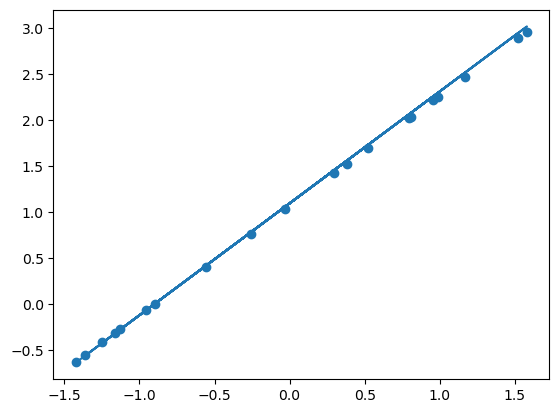

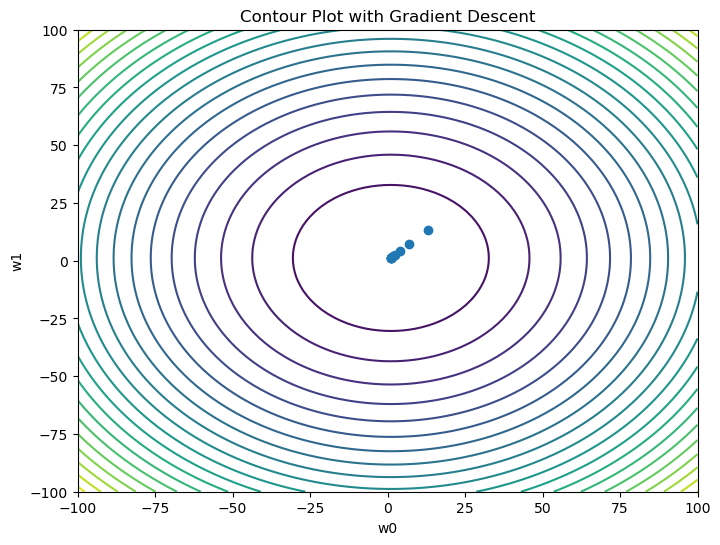

In [127]:
import numpy as np
import matplotlib.pyplot as plt


x = np.random.uniform(-1, 1, size=(20, 1))
y = 2*x+1

def standardization(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    standardized_x = (x - x_mean) / x_std
    return standardized_x

x = standardization(x)

a = np.linspace(-100, 100, 100)
b = np.linspace(-100, 100, 100)

list_w0 = []
list_w1 = []

X, Y = np.meshgrid(a, b)

def MSE(w0,w1,x,y):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i])**2
    return S/(2*len(x))

def Fw0(w0,w1,x):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i])
    return S

def Fw1(w0,w1,x):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i]) * x[i]
    return S

def Gradeint_Descent(w0,w1,x,y):
    alpha = 0.5
    mse = 1000
    i = 0
    while mse > 0.001:
        w0 = w0 - (alpha/len(x)) * Fw0(w0,w1,x)
        w1 = w1 - (alpha/len(x)) * Fw1(w0,w1,x)
        mse = MSE(w0,w1,x,y)
        list_w0.append(w0)
        list_w1.append(w1)
        i+=1
    print('round to optimize :',i)
    return w0,w1


def hypothesis(x,y):
  w0,w1 = Gradeint_Descent(25,25,x,y)
  return w0 + w1*x


plt.scatter(x,y) # Scatter Plot
plt.plot(x, hypothesis(x,y))

Z = MSE(X,Y,x,y)
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.scatter(list_w0, list_w1)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Contour Plot with Gradient Descent')
plt.show()

Standardized Multi X

In [4]:
import numpy as np

X = np.array([[7,7,8,9],
            [5,3,3,2],
            [1,2,2,1],
            [6,6,4,3]])

            
Y = np.array([460,232,315,178])

def standardized(X):
    n = len(X)
    m = len(X[0])
    X_std = np.empty((n, m)) 
    
    for i in range(n):
        sigma = np.std(X[i])
        mean = np.mean(X[i])
        for j in range(m):
            X_std[i][j] = (X[i][j] - mean) / sigma  
    return X_std
        

X_std = standardized(X)
print(X_std)


[[-0.90453403 -0.90453403  0.30151134  1.50755672]
 [ 1.60591014 -0.22941573 -0.22941573 -1.14707867]
 [-1.          1.          1.         -1.        ]
 [ 0.96225045  0.96225045 -0.57735027 -1.34715063]]


3. เขียนโปรแกรมสำหรับแสดงผลของการปรับพารามิเตอร์การเรียนรู้


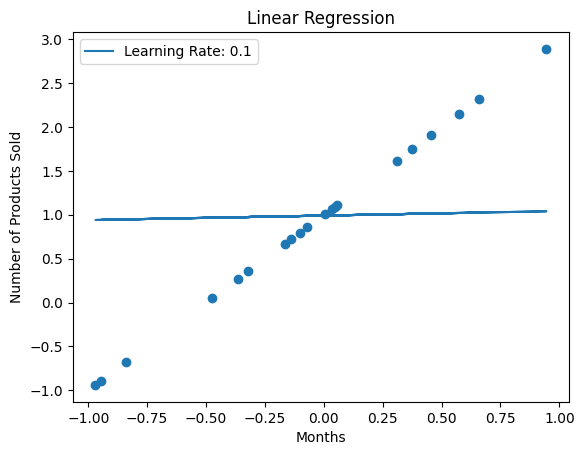

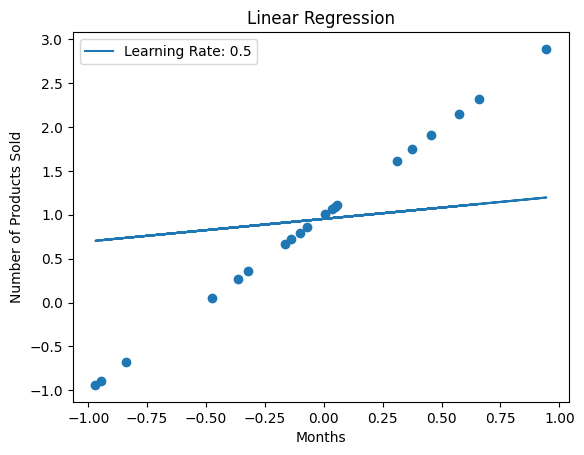

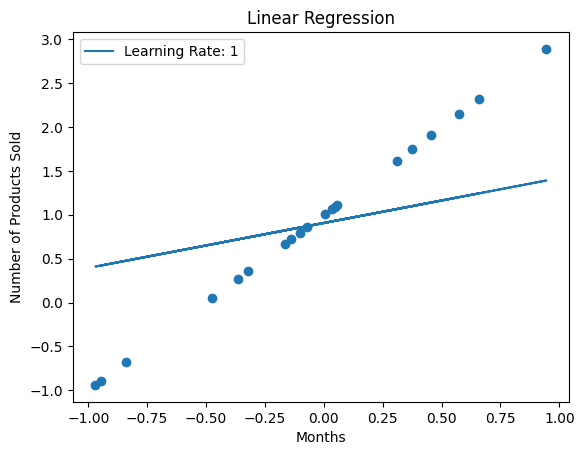

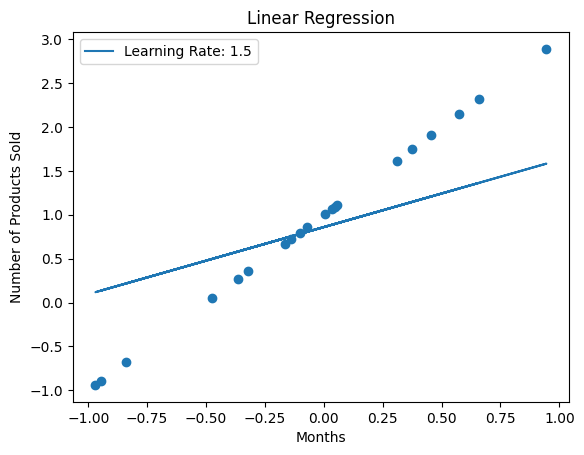

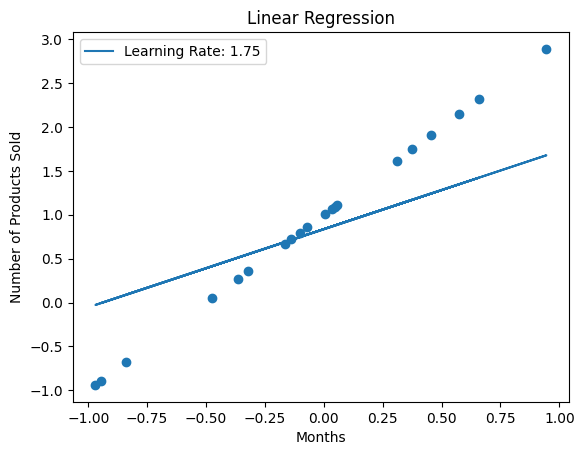

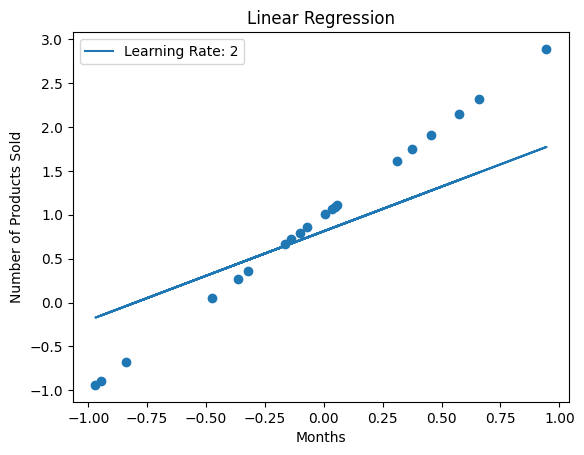

In [1]:
import numpy as np
import matplotlib.pyplot as plt



x = np.random.uniform(-1, 1, size=(20, 1))
y = 2*x+1

list_w0 = []
list_w1 = []

def MSE (w0,w1):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i])**2
    return S/(2*len(x))

def Fw0 (w0,w1):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i])
    return S

def Fw1 (w0,w1):
    S = 0
    for i in range(len(x)):
        S = S + ((w0 + w1*x[i])-y[i]) * x[i]
    return S


def Gradient_Descent(w0, w1, alpha):
    mse = float('inf')
    threshold = 0.8
    while mse > threshold:
        w0 = w0 - (alpha / len(x)) * Fw0(w0, w1)
        w1 = w1 - (alpha / len(x)) * Fw1(w0, w1)
        mse = MSE(w0, w1)
        list_w0.append(w0)
        list_w1.append(w1)
    return w0, w1

# def display_results_all(learning_rate):  #This code will plot graphs in subplot
#     import math
#     j = 1
#     n=len(learning_rate)
#     n_rows=2
#     n_cols=math.ceil(n / n_rows)
#     fig = plt.figure(figsize=(10 * n_cols, 8 * n_rows))
#     for rate in learning_rate:
#         w0, w1 = Gradient_Descent(1, 0, rate)
#         fig.add_subplot(n_rows, n_cols, j)
#         plt.scatter(x, y,color = 'green', alpha=.2)
#         plt.plot(x, [w0 + w1 * i for i in x], label=f'Learning Rate: {rate}')
#         plt.xlabel('Months')
#         plt.ylabel('Number of Products Sold')
#         plt.xlim(-1,1)
#         plt.ylim(-1,3)
#         plt.title('Linear Regression')
#         plt.legend()
#         j +=1
# display_results_all([0.1, 0.5,1, 1.5,1.75,2])

def display_results(learning_rate):
    w0, w1 = Gradient_Descent(1, 0, learning_rate)   #wo,w1 = 1,0 is init value

    plt.scatter(x, y)
    plt.plot(x, [w0 + w1 * i for i in x], label=f'Learning Rate: {learning_rate}')
    plt.xlabel('Months')
    plt.ylabel('Number of Products Sold')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()


learning_rates = [0.1, 0.5,1, 1.5,1.75,2]

for lr in learning_rates:
    display_results(lr)

4. เขียนโปรแกรมสำหรับเปรียบเทียบผลลัพธ์ที่ได้จากวิธี สมการปกติ และ วิธีลดตามความชัน


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[7,7,8,9],
 [5,3,3,2],
 [1,2,2,1],
 [6,6,4,3]])
Y = np.array([460,232,315,178])

def standadize(X):
    n = len(X)
    m = len(X[0])
    X_std = np.empty((n, m)) 
    
    for i in range(n):
        sigma = np.std(X[i])
        mean = np.mean(X[i])
        for j in range(m):
            X_std[i][j] = (X[i][j] - mean) / sigma  
    return X_std
        
def h_x(XT,W):
    return np.dot(XT,W)

def MSE (y,y_pred):
    m = len(y)
    mse = (1/2*m) * np.sum(y_pred-y)**2
    return mse

def Gradeint_Descent(X,Y):
    alpha = 0.001
    m = len(Y)
    n = X.shape[1]
    w = np.zeros(n)
    mse = 100000
    while mse > 1 :
        y_pred = np.dot(X,w)
        mse = MSE(Y,y_pred)
        gradients = (1/m) * np.dot(X.T,(y_pred - Y))
        w = w - alpha * gradients
    return w

def Normal_Equation(X,Y):
    A = np.dot(X.T, X)
    B = np.dot(X.T,Y)
    A_I = np.linalg.inv(A)

    W = np.dot(A_I,B)
    return W


print("Form Gradient Descent W = ",Gradeint_Descent(X,Y))
print("Form Normal Equation W = ",Normal_Equation(X,Y))

Form Gradient Descent W =  [ -48.24373645  -57.5743439   309.7968312  -141.95226048]
Form Normal Equation W =  [ -48.34328358  -58.01492537  310.98507463 -142.59701493]


In [208]:
import numpy as np

X = np.random.uniform(-1, 1, size=(20, 1))
Y = 2 * X + 1

def Gradient_Descent(X, y):
    alpha = 0.01
    m = len(y)
    n = X.shape[1]
    w = np.zeros((n, 1))
    mse = 100
    while mse > 2:  
        y_pred = np.dot(X, w)
        mse = np.sum((y_pred - y)**2) / (2 * m)
        gradients = (1 / m) * np.dot(X.T, (y_pred - y))
        w = w - alpha * gradients
    return w

def MSE(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = Gradient_Descent(X_b, y)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1*X)-y)**2)
    return S / (2 * len(X))

print(MSE(X, Y))

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

def MSE(X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    theta = Normal_Equation(X,y)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1*X)-y)**2)
    return S/(2*len(X))

print(MSE(X, y))


1.5504022838363234
1.431638017357373


[1.   0.81 0.64 0.49]


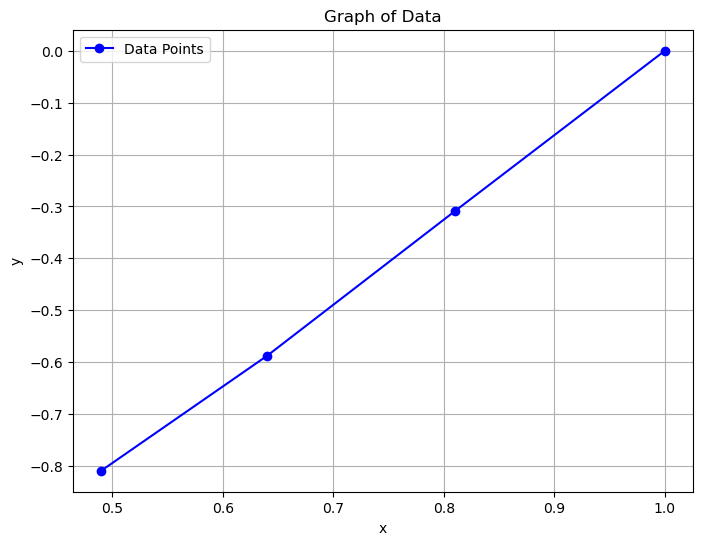

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
data = np.array([
    [-1, 1, -1, 1, -1, 1, -1, 1, -1.22e-16],
    [-0.9, 0.81, -0.729, 0.6561, -0.59049, 0.531441, -0.4782969, 0.43046721, -0.309016994],
    [-0.8, 0.64, -0.512, 0.4096, -0.32768, 0.262144, -0.2097152, 0.16777216, -0.587785252],
    [-0.7, 0.49, -0.343, 0.2401, -0.16807, 0.117649, -0.0823543, 0.05764801, -0.809016994]
])

x = data[:, 1]  # First column is x values
y = data[:, -1] # Last column is y values
print(x)

# Create a plot
plt.figure(figsize=(8, 6))

# Plot the data
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Data Points')

# Customize the plot
plt.title('Graph of Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Show the plot
plt.show()
